In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pylab as plt

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [3]:
df.shape

(693071, 57)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [6]:
df.dropna(axis=0, inplace=True)
df.shape

(637976, 57)

In [7]:
df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime','windBearing','timezone','product_id','icon','latitude','longitude'],axis=1)
df.shape

(637976, 36)

In [8]:
df = df.drop(['apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','precipIntensityMax','visibility.1'], axis=1)
df.shape

(637976, 24)

In [9]:
original_columns = df.columns.to_list()
original_columns

['hour',
 'day',
 'month',
 'source',
 'destination',
 'cab_type',
 'name',
 'price',
 'distance',
 'surge_multiplier',
 'temperature',
 'short_summary',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'visibility',
 'dewPoint',
 'pressure',
 'cloudCover',
 'uvIndex',
 'ozone',
 'moonPhase']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop(['price'], axis=1)
y = df['price']

# Split dataset into training, validation, and test sets (80-10-10 split)
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

# Identify categorical and numerical features
categorical_features = ['hour','day','month', 'source', 'destination', 'cab_type', 'name', 'short_summary']
standard_features = X_train.columns.difference(['hour','day','month', 'source', 'destination', 'cab_type', 'name', 'short_summary'])

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), categorical_features),
        ('std', StandardScaler(), standard_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the preprocessor on the training data
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# Let me display the first few rows of the preprocessed training data
X_train_prep

array([[ 0.        ,  0.        ,  1.        , ...,  0.58004386,
         0.74771373,  0.66467351],
       [ 0.        ,  0.        ,  0.        , ..., -1.33153859,
         1.19016728,  1.34477408],
       [ 0.        ,  0.        ,  0.        , ...,  0.47811844,
        -1.13176844, -1.61715925],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.58004386,
         0.74771373,  0.66467351],
       [ 0.        ,  0.        ,  0.        , ...,  0.56658201,
        -0.99751972, -1.17223364],
       [ 0.        ,  0.        ,  0.        , ...,  0.58735172,
        -0.85759851, -0.71459587]])

In [11]:
import pandas as pd

# Combine preprocessed features and target variable for training, validation, and test sets
train_data = pd.DataFrame(X_train_prep, columns=[f'feature_{i}' for i in range(X_train_prep.shape[1])])
train_data['target'] = y_train.values  # Assuming y_train is a pandas Series or array

val_data = pd.DataFrame(X_val_prep, columns=[f'feature_{i}' for i in range(X_val_prep.shape[1])])
val_data['target'] = y_val.values

test_data = pd.DataFrame(X_test_prep, columns=[f'feature_{i}' for i in range(X_test_prep.shape[1])])
test_data['target'] = y_test.values

# Save the preprocessed data into CSV files
train_data.to_csv("preprocessed_train_data.csv", index=False)
val_data.to_csv("preprocessed_val_data.csv", index=False)
test_data.to_csv("preprocessed_test_data.csv", index=False)

print("Preprocessed data has been saved as CSV files:")
print("1. preprocessed_train_data.csv")
print("2. preprocessed_val_data.csv")
print("3. preprocessed_test_data.csv")

Preprocessed data has been saved as CSV files:
1. preprocessed_train_data.csv
2. preprocessed_val_data.csv
3. preprocessed_test_data.csv


In [12]:
ohe_categories = preprocessor.named_transformers_['onehot'].categories_
ohe_feature_names = [
    f"{col}_{val}" for col, values in zip(categorical_features, ohe_categories) for val in values
]
ohe_feature_names

['hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_9',
 'day_10',
 'day_13',
 'day_14',
 'day_15',
 'day_16',
 'day_17',
 'day_18',
 'day_26',
 'day_27',
 'day_28',
 'day_29',
 'day_30',
 'month_11',
 'month_12',
 'source_Back Bay',
 'source_Beacon Hill',
 'source_Boston University',
 'source_Fenway',
 'source_Financial District',
 'source_Haymarket Square',
 'source_North End',
 'source_North Station',
 'source_Northeastern University',
 'source_South Station',
 'source_Theatre District',
 'source_West End',
 'destination_Back Bay',
 'destination_Beacon Hill',
 'destination_Boston University',
 'destination_Fenway',
 'destination_Financial District',
 'destination_Haymarket Square',
 'destination_North End',
 'destin

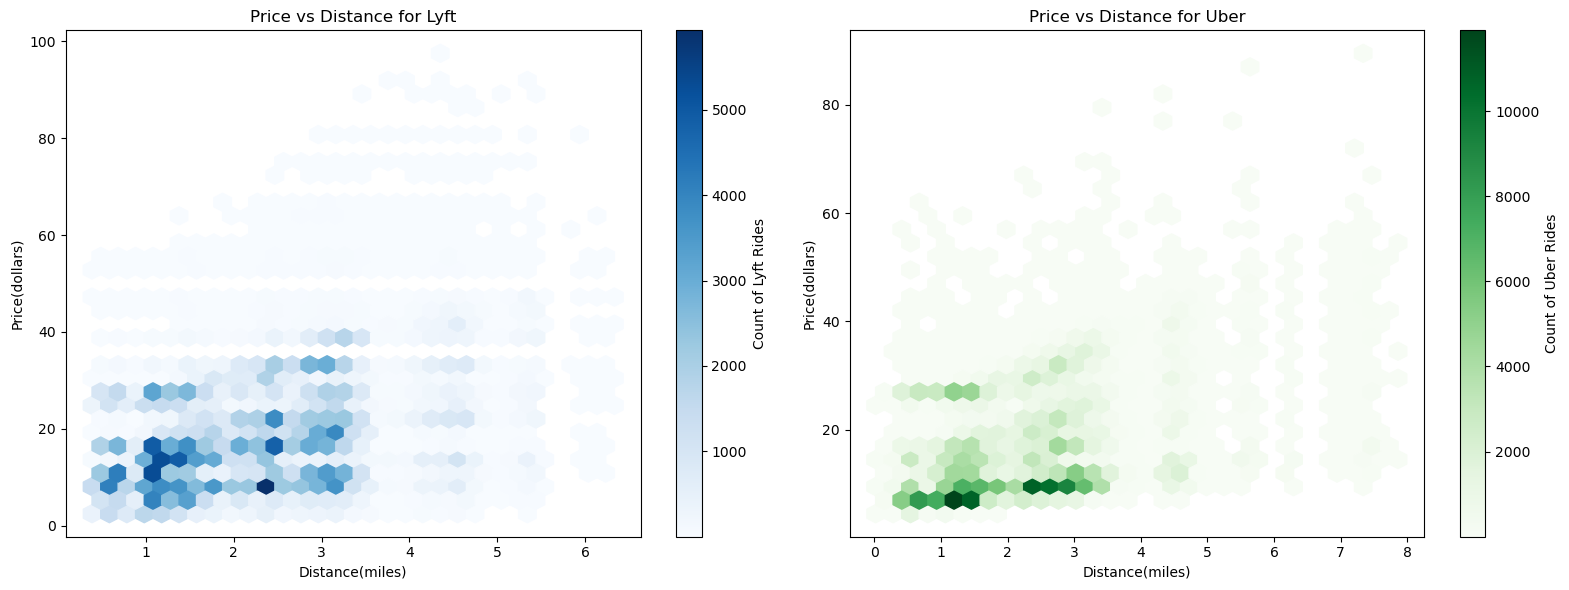

In [13]:
# Hexbin and Contour for Uber and Lyft
plt.figure(figsize=(16, 6))

# Lyft Hexbin
plt.subplot(1, 2, 1)
plt.hexbin(df[df['cab_type'] == 'Lyft']['distance'], 
           df[df['cab_type'] == 'Lyft']['price'], 
           gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count of Lyft Rides')
plt.title('Price vs Distance for Lyft')
plt.xlabel('Distance(miles)')
plt.ylabel('Price(dollars)')

# Uber Hexbin
plt.subplot(1, 2, 2)
plt.hexbin(df[df['cab_type'] == 'Uber']['distance'], 
           df[df['cab_type'] == 'Uber']['price'], 
           gridsize=30, cmap='Greens', mincnt=1)
plt.colorbar(label='Count of Uber Rides')
plt.title('Price vs Distance for Uber')
plt.xlabel('Distance(miles)')
plt.ylabel('Price(dollars)')

plt.tight_layout()
plt.show()


In [14]:
df[df['cab_type']=='Uber'].shape

(330568, 24)

In [15]:
df[df['cab_type']=='Lyft'].shape

(307408, 24)

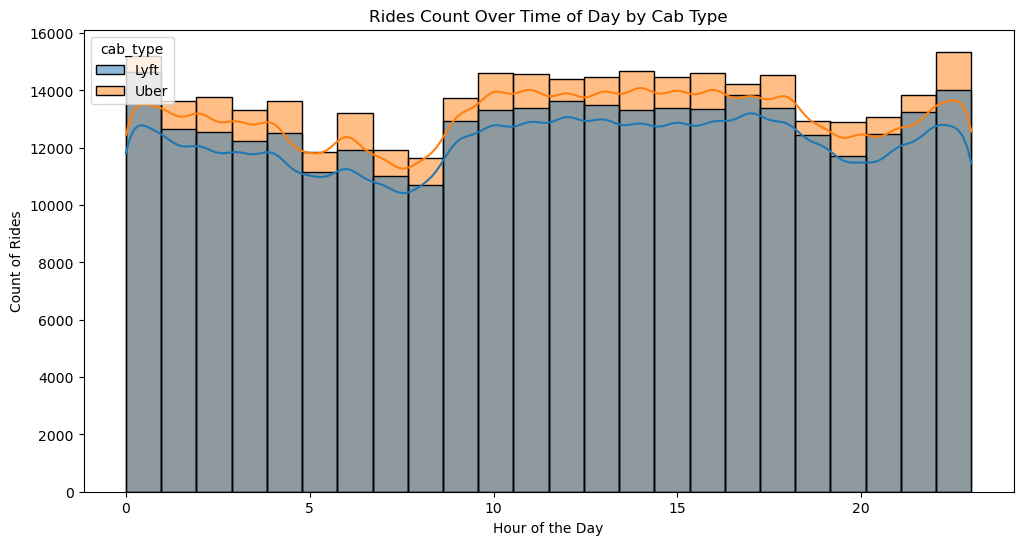

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x='hour', hue='cab_type', multiple='layer', kde=True, bins=24)
plt.title('Rides Count Over Time of Day by Cab Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Rides')
plt.show()

In [17]:
import plotly.express as px

weather_summary = df.groupby('short_summary').agg({'price': ['mean', 'count']}).reset_index()
weather_summary.columns = ['short_summary', 'avg_price', 'ride_count']
fig = px.treemap(weather_summary, 
                 path=['short_summary'], 
                 values='ride_count', 
                 color='avg_price', 
                 color_continuous_scale='RdBu', 
                 title='Treemap of Rides by Weather Conditions and Average Price')
fig.show()

In [18]:
all_feature_names = ohe_feature_names + list(standard_features)
all_feature_names

['hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_9',
 'day_10',
 'day_13',
 'day_14',
 'day_15',
 'day_16',
 'day_17',
 'day_18',
 'day_26',
 'day_27',
 'day_28',
 'day_29',
 'day_30',
 'month_11',
 'month_12',
 'source_Back Bay',
 'source_Beacon Hill',
 'source_Boston University',
 'source_Fenway',
 'source_Financial District',
 'source_Haymarket Square',
 'source_North End',
 'source_North Station',
 'source_Northeastern University',
 'source_South Station',
 'source_Theatre District',
 'source_West End',
 'destination_Back Bay',
 'destination_Beacon Hill',
 'destination_Boston University',
 'destination_Fenway',
 'destination_Financial District',
 'destination_Haymarket Square',
 'destination_North End',
 'destin

In [19]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import pickle
import shap
import inspect

In [21]:
def MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid, model_name):
    nr_states = 10
    test_scores = np.zeros(nr_states)
    r2_scores = np.zeros(nr_states)
    best_models = []

    for i in range(nr_states):
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=42 * i)
        X_other = pd.DataFrame(X_other, columns=X.columns)
        X_test = pd.DataFrame(X_test, columns=X.columns)

        kf = KFold(n_splits=3, shuffle=True, random_state=42 * i)
        if 'random_state' in inspect.signature(ML_algo).parameters:
            model = ML_algo(random_state=42 * i)
        else:
            model = ML_algo()
        
        pipe = make_pipeline(preprocessor, model)
        grid = GridSearchCV(pipe, param_grid=param_grid, scoring='neg_root_mean_squared_error',
                            cv=kf, return_train_score=True, n_jobs=-1, verbose=False)
        grid.fit(X_other, y_other)
        best_models.append(grid.best_estimator_)
        
        # Save the best model for this state
        model_filename = f"{model_name}_state_{i}.pkl"
        with open(model_filename, 'wb') as f:
            pickle.dump(grid.best_estimator_, f)
        
        # Evaluate the model
        y_test_pred = grid.best_estimator_.predict(X_test)
        test_scores[i] = root_mean_squared_error(y_test, y_test_pred)
        r2_scores[i] = r2_score(y_test, y_test_pred)

        print(f"Saved best model for {model_name}, State {i} -> {model_filename}")

    return test_scores, r2_scores, best_models

In [ ]:
def run_models(X, y, preprocessor):
    models = {
        'Lasso': (Lasso, {'lasso__alpha': [0.01, 0.1, 1]}),
        'Ridge': (Ridge, {'ridge__alpha': [0.01, 0.1, 1]}),
        'ElasticNet': (ElasticNet, {'elasticnet__alpha': [0.01, 0.1, 1], 'elasticnet__l1_ratio': [0.1, 0.5, 0.9]}),
        'RandomForest': (RandomForestRegressor, {'randomforestregressor__n_estimators': [50, 100], 'randomforestregressor__max_depth': [10, 20]}),
        'XGBoost': (xgb.XGBRegressor, {'xgbregressor__n_estimators': [50, 100], 'xgbregressor__learning_rate': [0.01, 0.1], 'xgbregressor__max_depth': [3, 5]})
    }

    results = {}
    
    for model_name, (ModelClass, param_grid) in models.items():
        print(f"\nTraining {model_name}...")
        test_scores, r2_scores, best_models = MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo=ModelClass, 
                                                                param_grid=param_grid, model_name=model_name)
        mean_rmse = np.mean(test_scores)
        std_rmse = np.std(test_scores)
        mean_r2 = np.mean(r2_scores)
        std_r2 = np.std(r2_scores)
        results[model_name] = {
            'mean_test_score': mean_rmse,
            'std_test_score': std_rmse,
            'mean_test_r2_score': mean_r2,
            'std_test_r2_score': std_r2,
            'best_models': best_models
        }
        print(f"{model_name}: Mean RMSE = {mean_rmse:.4f}, Std Dev = {std_rmse:.4f}; Mean R2 = {mean_r2:.4f}, Std Dev = {std_r2:.4f}")
        
        # Save the model results
        results_filename = f"{model_name}_results.pkl"
        with open(results_filename, 'wb') as f:
            pickle.dump(results[model_name], f)
        print(f"Saved results for {model_name} -> {results_filename}")
    
    return results

model_results = run_models(X, y, preprocessor)

best_model_name = min(model_results, key=lambda k: model_results[k]['mean_test_score'])
best_model_info = model_results[best_model_name]
print(f"\nThe best model is: {best_model_name}")
print(f"Mean RMSE: {best_model_info['mean_test_score']:.4f}, Std Dev: {best_model_info['std_test_score']:.4f}")


Training Lasso...
Saved best model for Lasso, State 0 -> Lasso_state_0.pkl
Saved best model for Lasso, State 1 -> Lasso_state_1.pkl
Saved best model for Lasso, State 2 -> Lasso_state_2.pkl
Saved best model for Lasso, State 3 -> Lasso_state_3.pkl
Saved best model for Lasso, State 4 -> Lasso_state_4.pkl
Saved best model for Lasso, State 5 -> Lasso_state_5.pkl
Saved best model for Lasso, State 6 -> Lasso_state_6.pkl
Saved best model for Lasso, State 7 -> Lasso_state_7.pkl
Saved best model for Lasso, State 8 -> Lasso_state_8.pkl
Saved best model for Lasso, State 9 -> Lasso_state_9.pkl
Lasso: Mean RMSE = 2.3978, Std Dev = 0.0714; Mean R2 = 0.9312, Std Dev = 0.0039
Saved results for Lasso -> Lasso_results.pkl

Training Ridge...
Saved best model for Ridge, State 0 -> Ridge_state_0.pkl
Saved best model for Ridge, State 1 -> Ridge_state_1.pkl
Saved best model for Ridge, State 2 -> Ridge_state_2.pkl
Saved best model for Ridge, State 3 -> Ridge_state_3.pkl
Saved best model for Ridge, State 4 -> 

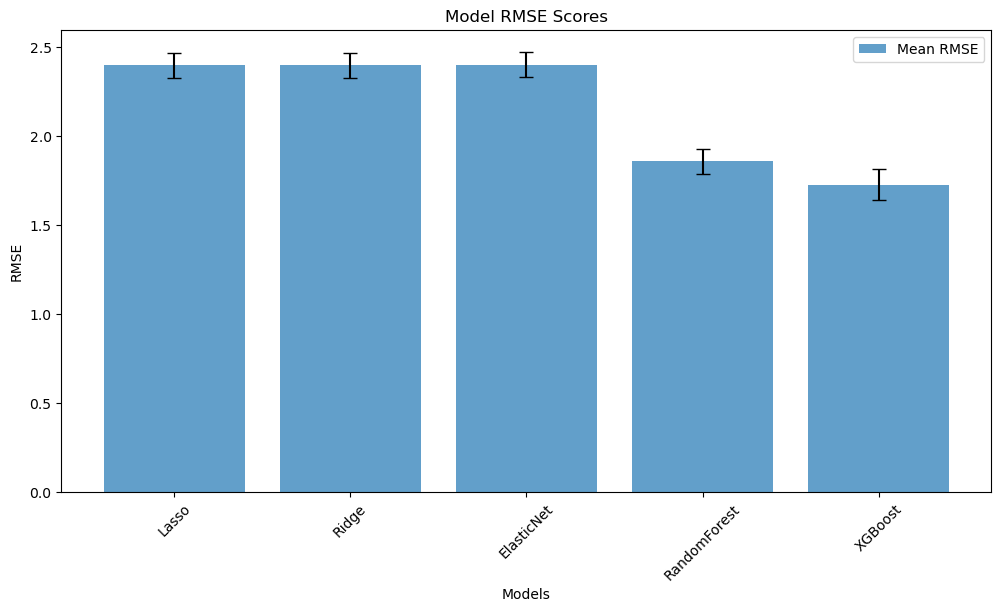

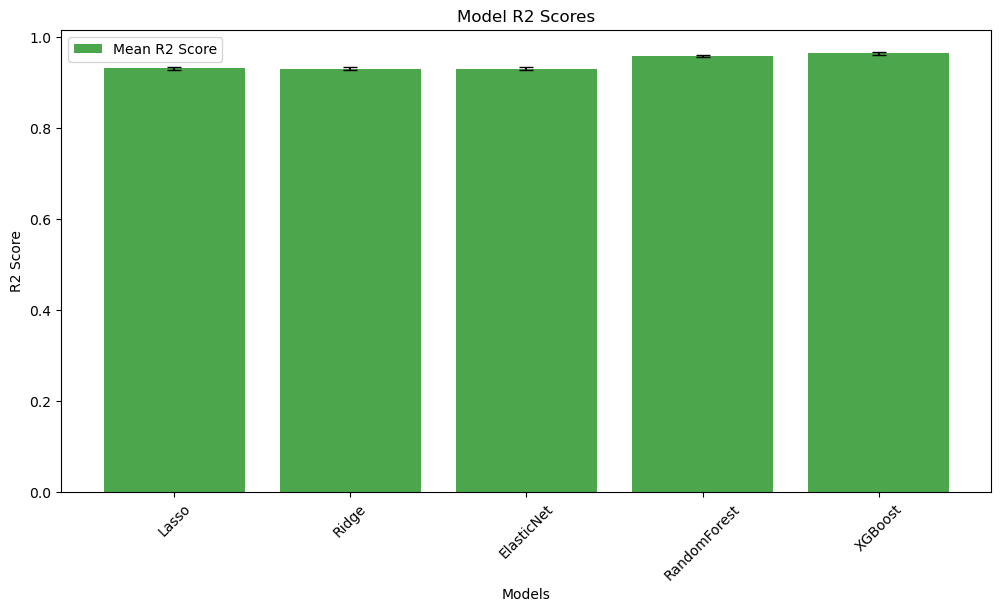

In [24]:
# Extract RMSE and R2 scores for each model from model_results
model_names = list(model_results.keys())
mean_rmse_scores = [model_results[model]['mean_test_score'] for model in model_names]
std_rmse_scores = [model_results[model]['std_test_score'] for model in model_names]
mean_r2_scores = [model_results[model]['mean_test_r2_score'] for model in model_names]
std_r2_scores = [model_results[model]['std_test_r2_score'] for model in model_names]

# Plot RMSE scores
plt.figure(figsize=(12, 6))
plt.bar(model_names, mean_rmse_scores, yerr=std_rmse_scores, capsize=5, alpha=0.7, label='Mean RMSE')
plt.title('Model RMSE Scores')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot R2 scores
plt.figure(figsize=(12, 6))
plt.bar(model_names, mean_r2_scores, yerr=std_r2_scores, capsize=5, alpha=0.7, color='green', label='Mean R2 Score')
plt.title('Model R2 Scores')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=0)
X_prep = preprocessor.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(f'preprocessed train size: {df_train.shape}')

df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
print(f'preprocessed validation size: {df_CV.shape}')

df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(f'preprocessed test size: {df_test.shape}')

y_pred_baseline = np.full(shape=y_test.shape, fill_value=y_train.mean())

# Evaluate the baseline model
mse_baseline = root_mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print(f"Baseline Model (Mean Prediction) - RMSE: {mse_baseline}, R2: {r2_baseline}")

preprocessed train size: (6000, 105)
preprocessed validation size: (2000, 105)
preprocessed test size: (2000, 105)
Baseline Model (Mean Prediction) - RMSE: 9.322323124867774, R2: -0.001905801793884443


In [26]:
from sklearn.metrics import r2_score
from sklearn.model_selection import ParameterGrid

# parameters to try 
param_grid = {'xgbregressor__learning_rate': [0.1], 'xgbregressor__max_depth': [5], 'xgbregressor__n_estimators': [100]}

# create xgboost model and set parameters 
XGB = xgb.XGBRegressor(early_stopping_rounds=50)
XGB.set_params(**ParameterGrid(param_grid)[0])

# fit model to train data 
XGB.fit(df_train,y_train,eval_set=[(df_CV, y_CV)], verbose=False)

# predict on validation 
y_CV_pred = XGB.predict(df_CV)
print('the CV RMSE:',np.sqrt(root_mean_squared_error(y_CV,y_CV_pred)))

# predict on test 
y_test_pred = XGB.predict(df_test)
print('the test RMSE:',np.sqrt(root_mean_squared_error(y_test,y_test_pred)))
print('the test R2:',r2_score(y_test,y_test_pred))

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[03:33:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1724807642624/work/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators" } are not used.




the CV RMSE: 1.3528470829134174
the test RMSE: 1.3728092212365544
the test R2: 0.9590532593208213


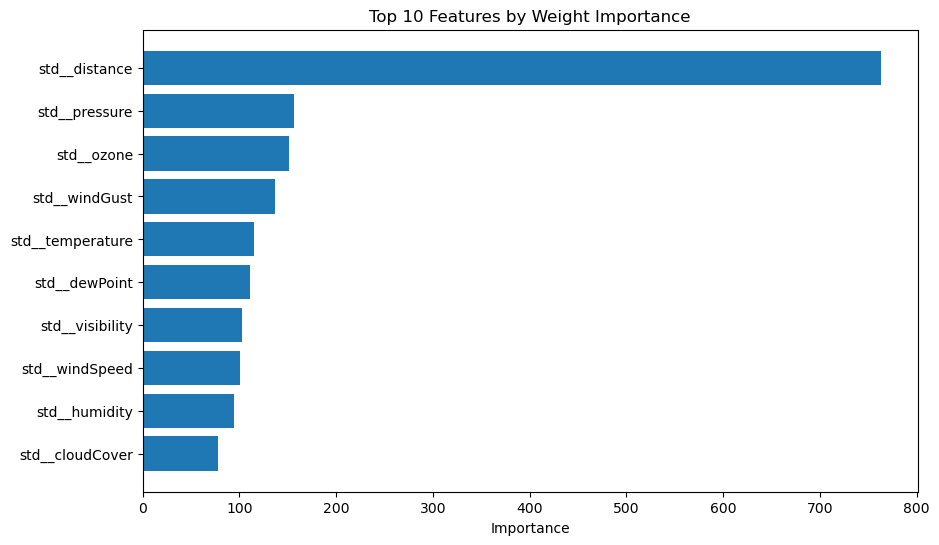

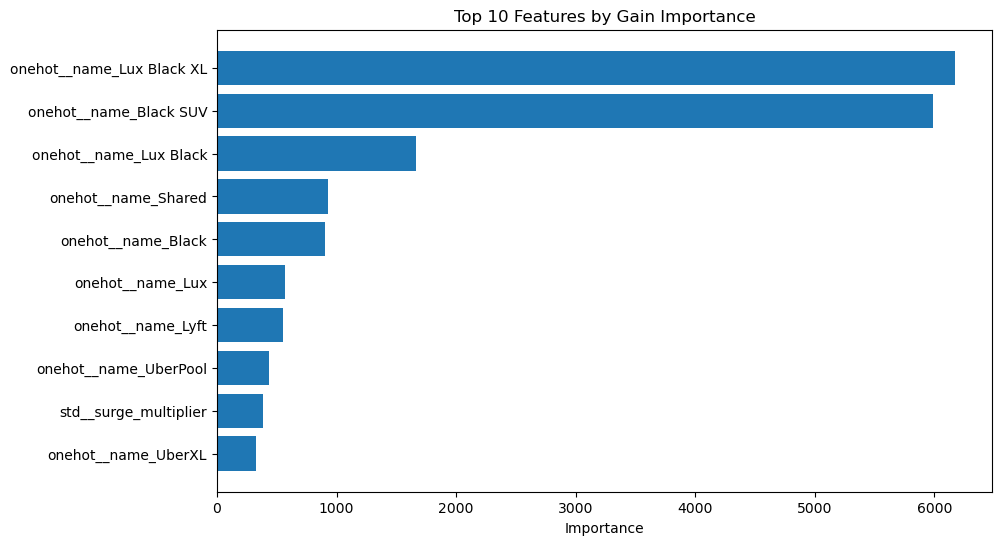

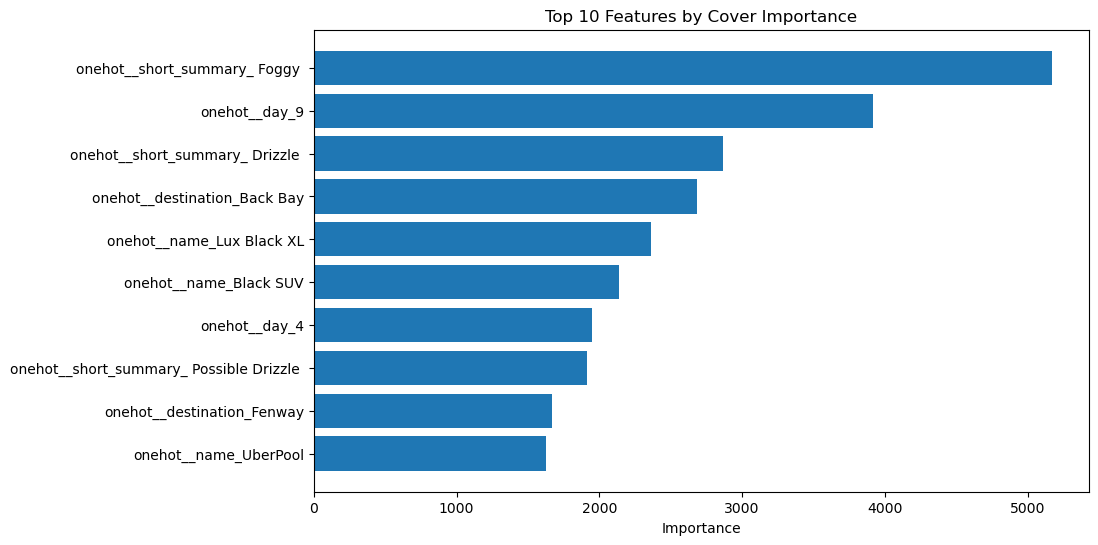

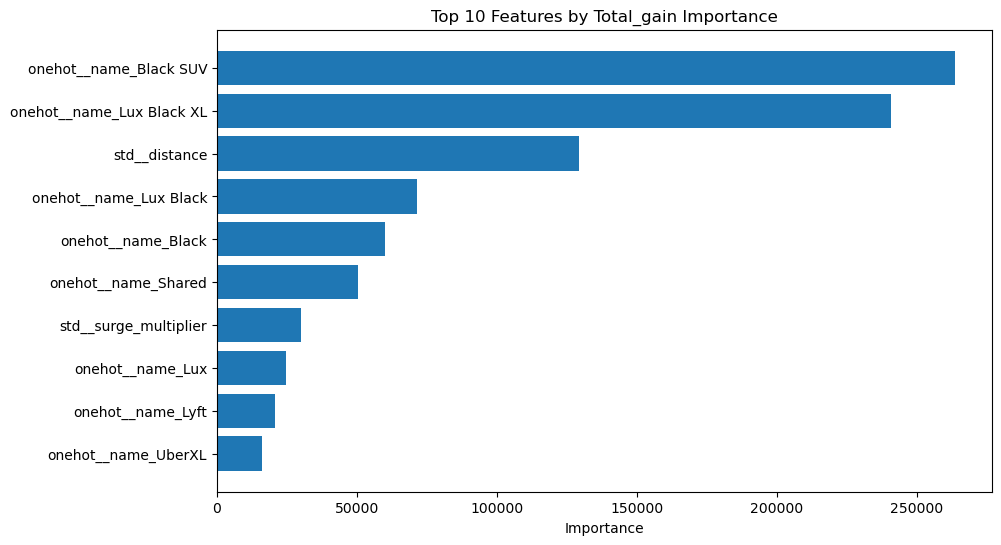

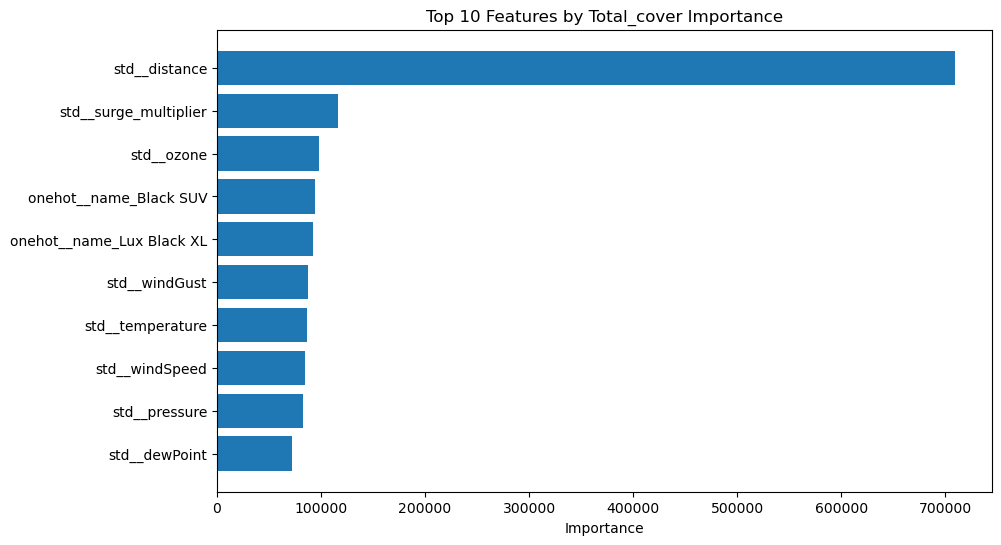

In [27]:
importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
feature_importances = {}

for importance_type in importance_types:
    feature_importances[importance_type] = XGB.get_booster().get_score(importance_type=importance_type)

importance_dfs = {
    metric: pd.DataFrame({
        'Feature': list(feature_importances[metric].keys()),
        'Importance': list(feature_importances[metric].values())
    }).sort_values(by='Importance', ascending=False)
    for metric in feature_importances
}

for metric, df in importance_dfs.items():
    top_10 = df.head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(top_10['Feature'], top_10['Importance'], align='center')
    plt.gca().invert_yaxis()
    plt.xlabel('Importance')
    plt.title(f'Top 10 Features by {metric.capitalize()} Importance')
    plt.show()

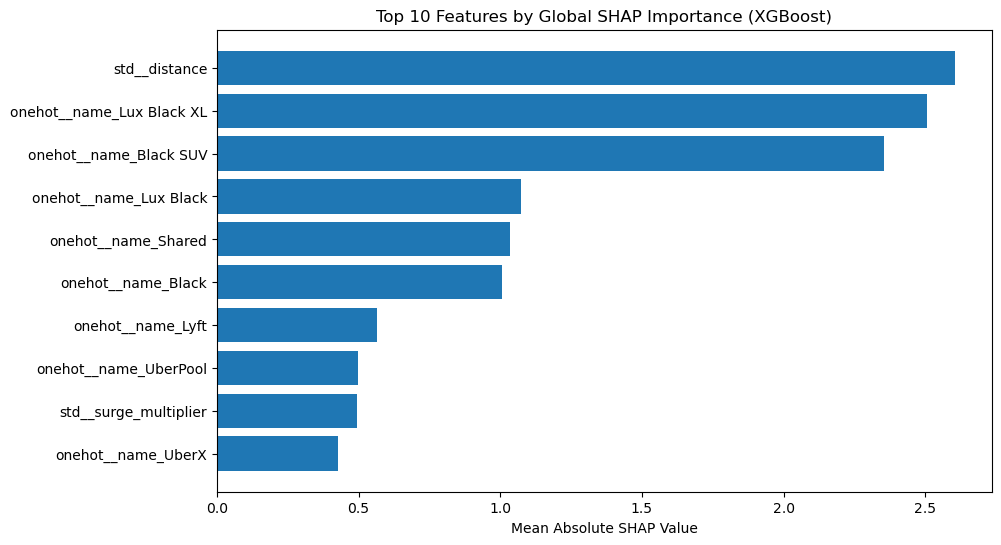

In [28]:
dtest = xgb.DMatrix(df_test)

booster = XGB.get_booster()
shap_values = booster.predict(dtest, pred_contribs=True)

mean_abs_shap = np.abs(shap_values).mean(axis=0)[:-1]
shap_importance = pd.DataFrame({
    'Feature': df_test.columns,
    'Importance': mean_abs_shap
}).sort_values(by='Importance', ascending=False)

top_10_shap = shap_importance.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_shap['Feature'], top_10_shap['Importance'], align='center')
plt.gca().invert_yaxis()
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Top 10 Features by Global SHAP Importance (XGBoost)')
plt.show()

In [29]:
explainer = shap.Explainer(XGB, df_test) 

specific_indices = [0, 100, 200]
specific_shap_values = explainer(df_test.iloc[specific_indices]) 
specific_data_points = df_test.iloc[specific_indices] 

shap.initjs()

for i, index in enumerate(specific_indices):
    force_plot = shap.force_plot(
        explainer.expected_value,
        specific_shap_values.values[i],
        specific_data_points.iloc[i],
        feature_names=df_test.columns.tolist()
    )
    display(force_plot) 